# Advanced Machine learning - Breast Cancer Data


In [7]:
import pandas as pd
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

df = pd.read_csv(url,sep=",", header=None, index_col=None)

In [8]:
df.shape

(569, 32)

In [9]:
# dropping the ID variable as it is irrelavant
df1= df.drop(df.index[0],axis=1)
df1.shape

(569, 31)

In [10]:
df1.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [12]:
# Converting the Y labels to 0 and 1.
lb= LabelEncoder()
df1[df1.columns[0]] = lb.fit_transform(df1[df1.columns[0]])

numeric_data = df1[df1.columns[1:31]]
target_data = df1[df1.columns[0]]


# Pre-processing

In [299]:
raw = df1.to_numpy()
def my_function(name):
    logging.info("Thread %s: starting", name)
    for _ in range(100):
        randnums = np.random.randint(0,569,569)
        bootstrap.append(df1.iloc[randnums])
    logging.info("Thread %s: finishing", name)

threads = 10
format = "%(asctime)s: %(message)s"
logging.basicConfig(format=format, level=logging.INFO, datefmt="%H:%M:%S")
# multithread function
for i in range (0,threads):
    a=threading.Thread(target=my_function, args=(i,))
    a.start()
    
def bootstrap_resample(raw, n=None):
    
    if n==None:
        n= len(raw)
        
    resample_i = np.floor(np.random.rand(n)*len(raw)).astype(int)
    raw_resample = raw[resample_i]
    return raw_resample


raw = np.arange(10000)
raw_resample = bootstrap_resample(raw, n=1000)
print ('original mean:', raw.mean())
print ('resampled mean:', raw_resample.mean())






19:00:34: Thread 0: starting
19:00:34: Thread 1: starting
19:00:34: Thread 2: starting


original mean: 4999.5
resampled mean: 4971.353


19:00:34: Thread 3: starting
19:00:34: Thread 4: starting
19:00:34: Thread 5: starting
19:00:34: Thread 6: starting
19:00:34: Thread 7: starting
19:00:34: Thread 8: starting
19:00:34: Thread 9: starting
19:00:35: Thread 0: finishing
19:00:36: Thread 1: finishing
19:00:36: Thread 2: finishing
19:00:36: Thread 3: finishing
19:00:36: Thread 5: finishing
19:00:36: Thread 4: finishing
19:00:36: Thread 7: finishing
19:00:36: Thread 6: finishing
19:00:36: Thread 9: finishing
19:00:36: Thread 8: finishing


In [13]:
# Checking if data is balanced
target_data.value_counts()

0    357
1    212
Name: 1, dtype: int64

In [14]:
#Test and Train split

train = df1.loc[0:400]
train.shape

test = df1.loc[401:]
test.shape


(168, 31)

In [15]:
# spliting target
x_train = train[train.columns[1:31]]
y_train = train[1]

x_test = test[test.columns[1:31]]
y_test = test[1]

# Random Forest


In [193]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest Model

model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features= 'sqrt')

# Train model 

model.fit( x_train, y_train)

y_pred = model.predict(x_test)

In [195]:
from sklearn import metrics

# model accuracy

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9523809523809523


In [21]:
from pprint import pprint
from sklearn.model_selection import GridSearchCV

In [132]:
# Grid Search to ascertain hyperplane

# Setting tuned parameters for param_grid
parameters = {
    'bootstrap': [True],
    'max_depth': [2,5,10],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2,3,5],
    'n_estimators': [100,110,120,200,300,400]
}

In [133]:
grid_search = GridSearchCV(estimator= model, param_grid= parameters, cv= 3, n_jobs= -1, verbose= True)

grid_search.fit(x_train, y_train)

#Checking the best parameters.
print('The best parameters are:\n',grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  1.4min finished


The best parameters are:
 {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 3, 'n_estimators': 110}


In [185]:
# Grid Search Model

Gridmodel = RandomForestClassifier(n_estimators=110, bootstrap=True, max_features= 'sqrt', max_depth=5, min_samples_split=3)

# Train model 

Gridmodel.fit( x_train, y_train)

y_pred1 = Gridmodel.predict(x_test)

from sklearn import metrics

# model accuracy

print("Accuracy:", metrics.accuracy_score(y_test, y_pred1))

print("We can see that accuracy increases by applying the parameters optimized by the grid search")

Accuracy: 0.9702380952380952
We can see that accuracy increases by applying the parameters optimized by the grid search


In [127]:
import matplotlib.pyplot as plt
from collections import OrderedDict
RANDOM_STATE= 2020


In [128]:
# Random forest OOB

RandomEn = [
    ("RandomForest, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE))
    ]

In [129]:
error_rate = OrderedDict((label, []) for label, _ in RandomEn)

In [130]:
# Range of `n_estimators` values to explore.
min_estimators = 100
max_estimators = 300

for label, clf in RandomEn:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(x_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

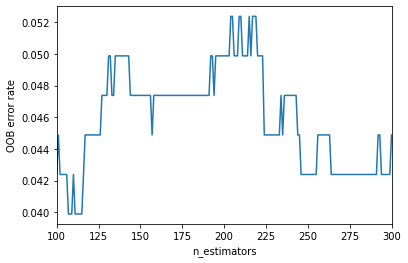

As we can see, the OOB rate is lowest between 100-120 estimators. The grid search selected 110 as the optimal number of trees. Therefore we can say that the results from both match.


In [140]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.show()

print("As we can see, the OOB rate is lowest between 100-120 estimators. The grid search selected 110 as the optimal number of trees. Therefore we can say that the results from both match.")

# Gradient Boosting

In [200]:
## Problem 3

## Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

GradientModel = GradientBoostingClassifier()

# Train model 

GradientModel.fit( x_train, y_train)

y_predGB = GradientModel.predict(x_test)

from sklearn import metrics

# model accuracy

print("Accuracy:", metrics.accuracy_score(y_test, y_predGB))


Accuracy: 0.9642857142857143


In [154]:
## Grid Search

Gparameters ={
    'max_depth': [2,3,4,5,10],
    'n_estimators': [50,70,100,200,300,400]
}



grid_searchGB = GridSearchCV(estimator= GradientModel, param_grid= Gparameters, cv= 3, n_jobs= -1, verbose= True)


grid_searchGB.fit(x_train, y_train)

grid_searchGB.best_params_


Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   20.1s finished


{'max_depth': 2, 'n_estimators': 300}

In [199]:
# Grid Search Model using parameters from search

GridmodelGB = GradientBoostingClassifier(n_estimators=300, max_depth=2)

# Train model 

GridmodelGB.fit( x_train, y_train)

y_predGB1 = GridmodelGB.predict(x_test)

from sklearn import metrics

# model accuracy

print("Accuracy:", metrics.accuracy_score(y_test, y_predGB1))

Accuracy: 0.9702380952380952


In [275]:
# Regularization on the model

GridmodelGB1 = GradientBoostingClassifier(n_estimators=400, max_depth=2, learning_rate= 0.05)

# Train model 

GridmodelGB1.fit( x_train, y_train)

y_predGB2 = GridmodelGB1.predict(x_test)

from sklearn import metrics

# model accuracy

print("Accuracy:", metrics.accuracy_score(y_test, y_predGB1))
print("Applying regularization, (learning_rate < 0.1),adds a penalty to the model and increases the accuracy")

Accuracy: 0.9702380952380952
Applying regularization, (learning_rate < 0.1),adds a penalty to the model and increases the accuracy


# ROC and Precision Recall Curves

In [160]:
from sklearn.datasets import make_classification    
from sklearn.model_selection import train_test_split  
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve


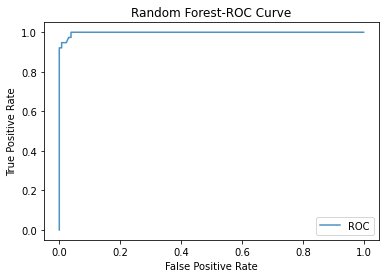

In [166]:
# Roc curve for Random Forest model
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, x_test, y_test, alpha=0.8, label= "ROC")
plt.title(label="Random Forest-ROC Curve")
plt.show()

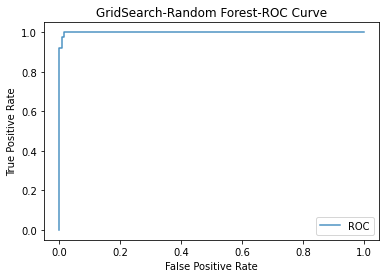

In [167]:
# Roc curve for GridSearch-Random Forest model
from sklearn.metrics import plot_roc_curve
plot_roc_curve(Gridmodel, x_test, y_test, alpha=0.8, label= "ROC")
plt.title(label="GridSearch-Random Forest-ROC Curve")
plt.show()


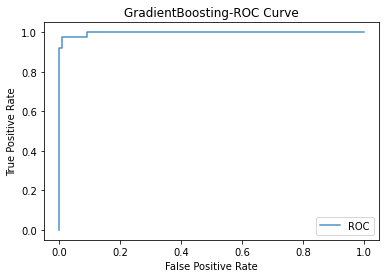

In [169]:
# Roc curve for  Gradient Boosting model
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GradientModel, x_test, y_test, alpha=0.8, label= "ROC")
plt.title(label="GradientBoosting-ROC Curve")
plt.show()

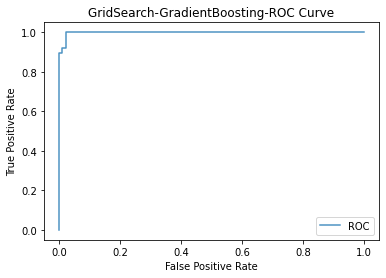

In [170]:
# Roc curve for GridSearch Gradient Boosting model
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GridmodelGB, x_test, y_test, alpha=0.8, label= "ROC")
plt.title(label="GridSearch-GradientBoosting-ROC Curve")
plt.show()

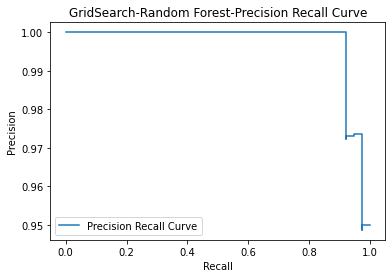

In [171]:
## Precision recall curve for GridSearch-Random Forest 
plot_precision_recall_curve(Gridmodel, x_test, y_test, label="Precision Recall Curve")
plt.title(label="GridSearch-Random Forest-Precision Recall Curve")
plt.show()

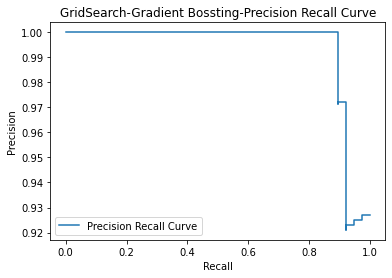

In [172]:
## Precision recall curve for GridSearch-Gradient Boosting
plot_precision_recall_curve(GridmodelGB, x_test, y_test, label="Precision Recall Curve")
plt.title(label="GridSearch-Gradient Bossting-Precision Recall Curve")
plt.show()

In [173]:
from sklearn.metrics import classification_report, confusion_matrix

In [196]:
# Confusion Matrix - Random Forest
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Model Diagnostics:",classification_report(y_test, y_pred))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[123   7]
 [  1  37]]
Model Diagnostics:               precision    recall  f1-score   support

           0       0.99      0.95      0.97       130
           1       0.84      0.97      0.90        38

    accuracy                           0.95       168
   macro avg       0.92      0.96      0.94       168
weighted avg       0.96      0.95      0.95       168

Accuracy: 0.9523809523809523


In [192]:
# Confusion Matrix - Random Forest Through GridSearch
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred1))
print("Model Diagnostics:",classification_report(y_test, y_pred1))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred1))

Confusion Matrix:
 [[126   4]
 [  1  37]]
Model Diagnostics:               precision    recall  f1-score   support

           0       0.99      0.97      0.98       130
           1       0.90      0.97      0.94        38

    accuracy                           0.97       168
   macro avg       0.95      0.97      0.96       168
weighted avg       0.97      0.97      0.97       168

Accuracy: 0.9702380952380952


In [201]:
# Confusion Matrix - Gradient Boosting
print("Confusion Matrix:\n",confusion_matrix(y_test, y_predGB))
print("Model Diagnostics:",classification_report(y_test, y_predGB))

print("Accuracy:", metrics.accuracy_score(y_test, y_predGB))

Confusion Matrix:
 [[125   5]
 [  1  37]]
Model Diagnostics:               precision    recall  f1-score   support

           0       0.99      0.96      0.98       130
           1       0.88      0.97      0.93        38

    accuracy                           0.96       168
   macro avg       0.94      0.97      0.95       168
weighted avg       0.97      0.96      0.96       168

Accuracy: 0.9642857142857143


In [258]:
# Confusion Matrix - Gradient Boosting through GridSearch
print("Confusion Matrix:\n",confusion_matrix(y_test, y_predGB1))
print("Model Diagnostics:",classification_report(y_test, y_predGB1))

print("Accuracy:", metrics.accuracy_score(y_test, y_predGB1))

Confusion Matrix:
 [[126   4]
 [  1  37]]
Model Diagnostics:               precision    recall  f1-score   support

           0       0.99      0.97      0.98       130
           1       0.90      0.97      0.94        38

    accuracy                           0.97       168
   macro avg       0.95      0.97      0.96       168
weighted avg       0.97      0.97      0.97       168

Accuracy: 0.9702380952380952


In [256]:
# Confusion Matrix - Gadient boosting + Regularization
print("Confusion Matrix:\n",confusion_matrix(y_test, y_predGB1))
print("Model Diagnostics:",classification_report(y_test, y_predGB1))

print("Accuracy:", metrics.accuracy_score(y_test, y_predGB1))

Confusion Matrix:
 [[126   4]
 [  1  37]]
Model Diagnostics:               precision    recall  f1-score   support

           0       0.99      0.97      0.98       130
           1       0.90      0.97      0.94        38

    accuracy                           0.97       168
   macro avg       0.95      0.97      0.96       168
weighted avg       0.97      0.97      0.97       168

Accuracy: 0.9702380952380952


# METRIC ANALYSIS

In [266]:
a=("""The ROC curves of Random forest after selecting the parameters through Grid Search improve slightly. 
Similarly, the Precision Recall Curves perform mostly the same, with slight imrpovement after applying Grid Search. 

For Gradient Boosting, although the curves perform well, the curves improve after applying the parameters obtained from the Grid Search
This happens with both, ROC curves and Precision curves. 

For Random Forest, the initial accuracy score is 95.23, which after applying the parameters from the GridSearch increases to 97.02.
For Gradient Boosting, the initial accuracy score is 96.4, which increases to 97.02 after GridSearch, and further increases to 97.6 after regularization.

This means that Grid Search parameters supply better hyperplanes to classify the data. Additionally, regularization adds a penalty that further increases the accuracy.

In Random Forest,the Confusion Matrix shows that after GridSearch, the True Positives, increase from 123 to 126 and the False Positives decrease from 7 to 4.

Whereas in Gradient Boosting, the Confusion MAtrix shows that after GridSearch, the True Positives increase by 1 and the False Positives decrease by 1.""")

print(a)

The ROC curves of Random forest after selecting the parameters through Grid Search improve slightly. 
Similarly, the Precision Recall Curves perform mostly the same, with slight imrpovement after applying Grid Search. 

For Gradient Boosting, although the curves perform well, the curves improve after applying the parameters obtained from the Grid Search
This happens with both, ROC curves and Precision curves. 

For Random Forest, the initial accuracy score is 95.23, which after applying the parameters from the GridSearch increases to 97.02.
For Gradient Boosting, the initial accuracy score is 96.4, which increases to 97.02 after GridSearch, and further increases to 97.6 after regularization.

This means that Grid Search parameters supply better hyperplanes to classify the data. Additionally, regularization adds a penalty that further increases the accuracy.

In Random Forest,the Confusion Matrix shows that after GridSearch, the True Positives, increase from 123 to 126 and the False Pos

In [267]:
# Comparing Performing After PCA

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# Random Forest Model

# Train model 

model.fit( x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

print("RESULTS :The Random Forest model performs better before without applying PCA")

Accuracy: 0.9166666666666666
RESULTS :The Random Forest model performs better before without applying PCA


In [268]:
# Gradient Boost Model

#Train model

Gradientmodel = ( x_train, y_train)
y_predGB = model.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_predGB))

print("RESULTs: The Gradient Boosting model performs better before without applying PCA")


Accuracy: 0.9166666666666666
RESULTs: The Gradient Boosting model performs better before without applying PCA


# Stacked Model

In [244]:
# Stacked Model

from mlxtend.classifier import StackingClassifier
import warnings
from mlxtend.classifier import StackingCVClassifier
warnings.simplefilter('ignore')

In [246]:
clf1 = Gridmodel
clf2 = GridmodelGB
clf3 = GridmodelGB1

sclf = StackingCVClassifier(classifiers = [clf1, clf2, clf3],
                            shuffle = False,
                            use_probas = True,
                            cv = 5,
                            meta_classifier = clf3)



In [248]:
# Create list to store classifiers
classifiers = {"RandomF": clf1,
               "GradientBoost": clf2,
               "GB regularized": clf3,
               "Stack": sclf}

In [269]:
print('3-fold cross validation:\n')
from sklearn import model_selection
for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['Random Forest', 
                       'Gradient Boosting', 
                       'Gradient Boosting Regularised',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, x_train, y_train, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.92 (+/- 0.01) [Random Forest]
Accuracy: 0.91 (+/- 0.01) [Gradient Boosting]
Accuracy: 0.91 (+/- 0.01) [Gradient Boosting Regularised]
Accuracy: 0.90 (+/- 0.01) [StackingClassifier]


In [271]:
print("In summary, The 3 fold Cross validation of all three models, generate a Stacked Classifier Accuracy of 0.90")

In summary, The 3 fold Cross validation of all three models, generate a Stacked Classifier Accuracy of 0.90
